In [95]:
import pandas as pd
import sklearn
import numpy as np
import csv

In [96]:
testset = pd.read_csv("test.tsv", sep = "\t")

In [97]:
pred = pd.read_csv("test_results.tsv", sep = "\t", header = None)

In [98]:
testset

,label,index,sentence1,sentence2
0,entailment,0,"She arrived with her friend, very lethargic.",she appeared unenergetic
1,contradiction,1,"She arrived with her friend, very lethargic.","she arrived alert and oriented, energetic, in..."
2,neutral,2,"She arrived with her friend, very lethargic.",she was not ambulatory
3,entailment,3,"The patient was not acutely ill last night, so...",she is scheduled for a medical procedure today
4,contradiction,4,"The patient was not acutely ill last night, so...",the patient felt a sudden worsening in sympto...
...,...,...,...,...
400,contradiction,400,She was sent to the ER where a repeat CXR show...,The patient has a clear X-ray.
401,neutral,401,She was sent to the ER where a repeat CXR show...,The patient has pneumonia.
402,entailment,402,While on the floor he was started on azithromy...,The patient is being treated for a CHF exacer...
403,contradiction,403,While on the floor he was started on azithromy...,The patient did not receive bronchodilators.


In [99]:
testset["predictions"] = np.argmax(np.array(pred), axis = 1)

In [100]:
label_encoding = {"neutral":2,"contradiction":0,"entailment":1}
reverse_encoding = {2:"neutral",0:"contradiction",1:"entailment"}
reverse_encoding_tuple = list(zip(list(reverse_encoding.values()),list(reverse_encoding.keys())))

In [101]:
testset["gold_label"] = testset["gold_label"].apply(lambda x: label_encoding[x])

KeyError: 'gold_label'

In [102]:
testset["gold_label"] = testset["label"].apply(lambda x: label_encoding[x])

In [103]:
testset["gold_label"].value_counts()

2    135
1    135
0    135
Name: gold_label, dtype: int64

In [104]:
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [105]:
confusionmatrix = cf(testset.gold_label,testset.predictions)
confusionmatrix
confusion_matrix_columns = [i[0] for i in sorted(reverse_encoding_tuple, key = lambda x : x[1])]

In [106]:
cfdf = pd.DataFrame(confusionmatrix, columns = confusion_matrix_columns, index = confusion_matrix_columns)
cfdf

,contradiction,entailment,neutral
contradiction,121,9,5
entailment,11,108,16
neutral,8,18,109


Text(0.5, 1.0, 'Confusion Matrix')

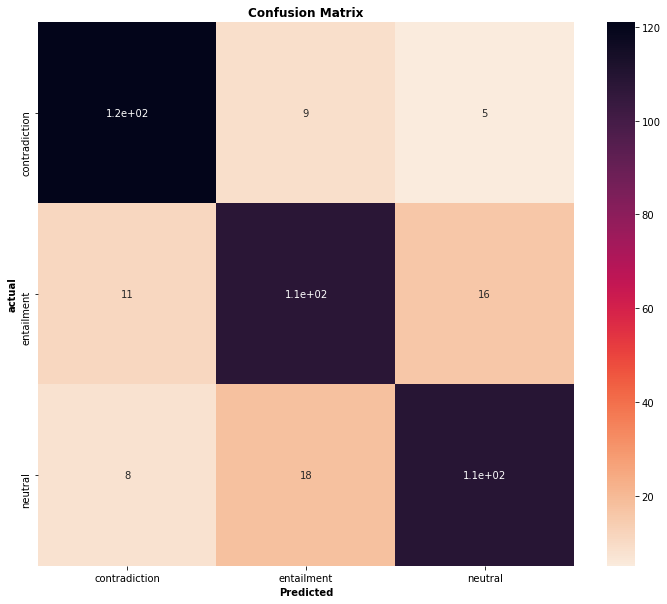

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.cm.rocket_r
fig = plt.figure(figsize = (12,10))
ax = sns.heatmap(cfdf, cmap = cmap, annot = True)
ax.set_xlabel("Predicted", fontweight = "bold")
ax.set_ylabel("actual", fontweight = "bold")
ax.set_title("Confusion Matrix", fontweight = "bold")

In [109]:
print("F1(micro) Score ----> ",f1_score(testset.gold_label,testset.predictions, average='micro'))
print("precision(micro) Score ----> ",precision_score(testset.gold_label,testset.predictions, average='micro'))
print("Recall(micro) Score ----> ",recall_score(testset.gold_label,testset.predictions, average='micro'))
print("Accuracy(micro) Score ----> ",accuracy_score(testset.gold_label,testset.predictions))

print("###############################################################")
print("F1(macro) Score ----> ",f1_score(testset.gold_label,testset.predictions, average='macro'))
print("precision(macro) Score ----> ",precision_score(testset.gold_label,testset.predictions, average='macro'))
print("Recall(macro) Score ----> ",recall_score(testset.gold_label,testset.predictions, average='macro'))
print("Accuracy(macro) Score ----> ",accuracy_score(testset.gold_label,testset.predictions))

F1(micro) Score ---->  0.8345679012345679
precision(micro) Score ---->  0.8345679012345679
Recall(micro) Score ---->  0.8345679012345679
Accuracy(micro) Score ---->  0.8345679012345679
###############################################################
F1(macro) Score ---->  0.8342138364779874
precision(macro) Score ---->  0.8342490842490843
Recall(macro) Score ---->  0.8345679012345678
Accuracy(macro) Score ---->  0.8345679012345679


In [64]:
print("precision(micro) Score ----> ",precision_score(testset.gold_label,testset.predictions, average='micro'))

precision(micro) Score ---->  0.8345679012345679


In [65]:
recall_score(testset.gold_label,testset.predictions, average='micro')

0.8345679012345679

In [110]:
# pred.columns = ["logit"+str(i) for i in range(1,len(pred.columns)+1)]
pred

,0,1,2
0,0.000045,0.999795,0.000160
1,0.999950,0.000017,0.000033
2,0.000035,0.999786,0.000178
3,0.000079,0.999833,0.000088
4,0.999758,0.000014,0.000228
...,...,...,...
400,0.999907,0.000010,0.000083
401,0.041898,0.255710,0.702392
402,0.000052,0.000118,0.999829
403,0.999947,0.000029,0.000023


In [111]:
testset = pd.concat([testset, pred], axis =1)

In [112]:
testset["confidence"]=0

In [113]:
for i in range(len(testset)):
    testset.loc[i,"confidence"]=testset.loc[i,testset.loc[i,"predictions"]]
    

In [114]:
testset["predictions_reverse_encoded"] = testset["predictions"].apply(lambda x : reverse_encoding[x])
testset["gold_label_reverse_encoded"] = testset["gold_label"].apply(lambda x : reverse_encoding[x])

In [115]:
confidence_error_chart = testset[testset.predictions!=testset.gold_label].groupby(["predictions_reverse_encoded",'gold_label_reverse_encoded']).confidence.mean()

In [116]:
testset[testset.predictions!=testset.gold_label]

,label,index,sentence1,sentence2,predictions,gold_label,0,1,2,confidence,predictions_reverse_encoded,gold_label_reverse_encoded
2,neutral,2,"She arrived with her friend, very lethargic.",she was not ambulatory,1,2,0.000035,0.999786,0.000178,0.999786,entailment,neutral
6,entailment,6,Reports lack of appetite but no n/v.,the patient denies nausea and vomiting,0,1,0.992663,0.007284,0.000054,0.992663,contradiction,entailment
18,entailment,18,"In the ED, her initial VS were HR 99, BP 102/5...","in the emergency room, her diastolic blood pr...",0,1,0.668757,0.330248,0.000995,0.668757,contradiction,entailment
20,neutral,20,"In the ED, her initial VS were HR 99, BP 102/5...",the patient received fluids in the ED,1,2,0.000020,0.999589,0.000391,0.999589,entailment,neutral
21,entailment,21,"In the ED, initial VS were: 8 98 64 131/113",in the ED initial respiratory rate was low,2,1,0.000164,0.005417,0.994418,0.994418,neutral,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
377,neutral,377,Chest x-ray showed bilateral effusions and lef...,The patient has lobar pneumonia.,0,2,0.826100,0.002282,0.171618,0.826100,contradiction,neutral
386,neutral,386,"Pericardial pressure decreased to 5mm Hg, and ...",The patient had cardiac tamponade.,1,2,0.000049,0.999699,0.000252,0.999699,entailment,neutral
395,neutral,395,BP was stable throughout.,The patient is normotensive.,1,2,0.000121,0.999761,0.000118,0.999761,entailment,neutral
396,entailment,396,A CXR was performed at the time to rule out pn...,The patient had a clear chest X-ray.,2,1,0.000370,0.000157,0.999474,0.999474,neutral,entailment


In [117]:
confidence_error_chart

predictions_reverse_encoded  gold_label_reverse_encoded
contradiction                entailment                    0.908067
                             neutral                       0.957461
entailment                   contradiction                 0.892425
                             neutral                       0.980472
neutral                      contradiction                 0.973567
                             entailment                    0.939604
Name: confidence, dtype: float64

In [118]:
testset

,label,index,sentence1,sentence2,predictions,gold_label,0,1,2,confidence,predictions_reverse_encoded,gold_label_reverse_encoded
0,entailment,0,"She arrived with her friend, very lethargic.",she appeared unenergetic,1,1,0.000045,0.999795,0.000160,0.999795,entailment,entailment
1,contradiction,1,"She arrived with her friend, very lethargic.","she arrived alert and oriented, energetic, in...",0,0,0.999950,0.000017,0.000033,0.999950,contradiction,contradiction
2,neutral,2,"She arrived with her friend, very lethargic.",she was not ambulatory,1,2,0.000035,0.999786,0.000178,0.999786,entailment,neutral
3,entailment,3,"The patient was not acutely ill last night, so...",she is scheduled for a medical procedure today,1,1,0.000079,0.999833,0.000088,0.999833,entailment,entailment
4,contradiction,4,"The patient was not acutely ill last night, so...",the patient felt a sudden worsening in sympto...,0,0,0.999758,0.000014,0.000228,0.999758,contradiction,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
400,contradiction,400,She was sent to the ER where a repeat CXR show...,The patient has a clear X-ray.,0,0,0.999907,0.000010,0.000083,0.999907,contradiction,contradiction
401,neutral,401,She was sent to the ER where a repeat CXR show...,The patient has pneumonia.,2,2,0.041898,0.255710,0.702392,0.702392,neutral,neutral
402,entailment,402,While on the floor he was started on azithromy...,The patient is being treated for a CHF exacer...,2,1,0.000052,0.000118,0.999829,0.999829,neutral,entailment
403,contradiction,403,While on the floor he was started on azithromy...,The patient did not receive bronchodilators.,0,0,0.999947,0.000029,0.000023,0.999947,contradiction,contradiction


In [119]:
testset.to_csv('testset.csv', index = None)

In [120]:
testset2 = pd.read_csv("testset.csv")

In [121]:
pwd

'/home/jupyter/nlidata'

In [122]:
testset["error"] = 2
for i in range(len(testset)):
    testset.loc[i,"error"]=testset.loc[i,testset.loc[i,"predictions"]]-testset.loc[i,testset.loc[i,"gold_label"]]

<AxesSubplot:ylabel='Frequency'>

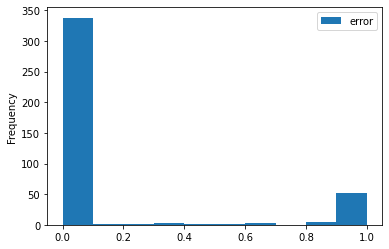

In [123]:
testset.loc[:,["error"]].plot.hist()

In [124]:
!pip install seaborn

In [125]:
import seaborn as sns
from scipy.stats import norm

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


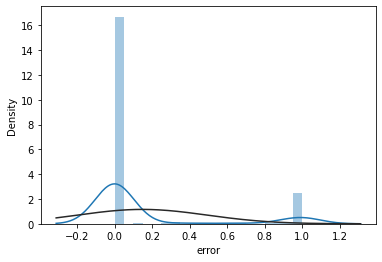

In [126]:
ax = sns.distplot(testset["error"], fit = norm)


In [127]:
reverse_encoding_tuple = list(zip(list(reverse_encoding.values()),list(reverse_encoding.keys())))

In [162]:
confusion_matrix_columns = [i[0] for i in sorted(reverse_encoding_tuple, key = lambda x : x[1])]

[('contradiction', 0), ('entailment', 1), ('neutral', 2)]

In [160]:
list(zip(list(reverse_encoding.values()),list(reverse_encoding.keys())))

[('neutral', 2), ('contradiction', 0), ('entailment', 1)]

In [128]:
testset

,label,index,sentence1,sentence2,predictions,gold_label,0,1,2,confidence,predictions_reverse_encoded,gold_label_reverse_encoded,error
0,entailment,0,"She arrived with her friend, very lethargic.",she appeared unenergetic,1,1,0.000045,0.999795,0.000160,0.999795,entailment,entailment,0.000000
1,contradiction,1,"She arrived with her friend, very lethargic.","she arrived alert and oriented, energetic, in...",0,0,0.999950,0.000017,0.000033,0.999950,contradiction,contradiction,0.000000
2,neutral,2,"She arrived with her friend, very lethargic.",she was not ambulatory,1,2,0.000035,0.999786,0.000178,0.999786,entailment,neutral,0.999608
3,entailment,3,"The patient was not acutely ill last night, so...",she is scheduled for a medical procedure today,1,1,0.000079,0.999833,0.000088,0.999833,entailment,entailment,0.000000
4,contradiction,4,"The patient was not acutely ill last night, so...",the patient felt a sudden worsening in sympto...,0,0,0.999758,0.000014,0.000228,0.999758,contradiction,contradiction,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,contradiction,400,She was sent to the ER where a repeat CXR show...,The patient has a clear X-ray.,0,0,0.999907,0.000010,0.000083,0.999907,contradiction,contradiction,0.000000
401,neutral,401,She was sent to the ER where a repeat CXR show...,The patient has pneumonia.,2,2,0.041898,0.255710,0.702392,0.702392,neutral,neutral,0.000000
402,entailment,402,While on the floor he was started on azithromy...,The patient is being treated for a CHF exacer...,2,1,0.000052,0.000118,0.999829,0.999829,neutral,entailment,0.999711
403,contradiction,403,While on the floor he was started on azithromy...,The patient did not receive bronchodilators.,0,0,0.999947,0.000029,0.000023,0.999947,contradiction,contradiction,0.000000


In [132]:
testset.sort_values("error", ascending = False).to_csv("testsetfile.csv", index = False)

In [136]:
pd.read_json("nliraw/test/mli_dev_v1.jsonl", lines = True).to_csv("test.csv")

In [138]:
abbreviations = list(pd.read_csv("medical_abbreviations.csv").iloc[:,0])

In [141]:
incorrect_predictions = testset[testset.predictions_reverse_encoded!=testset.gold_label_reverse_encoded]

In [143]:
incorrect_predictions

,label,index,sentence1,sentence2,predictions,gold_label,0,1,2,confidence,predictions_reverse_encoded,gold_label_reverse_encoded,error
2,neutral,2,"She arrived with her friend, very lethargic.",she was not ambulatory,1,2,0.000035,0.999786,0.000178,0.999786,entailment,neutral,0.999608
6,entailment,6,Reports lack of appetite but no n/v.,the patient denies nausea and vomiting,0,1,0.992663,0.007284,0.000054,0.992663,contradiction,entailment,0.985379
18,entailment,18,"In the ED, her initial VS were HR 99, BP 102/5...","in the emergency room, her diastolic blood pr...",0,1,0.668757,0.330248,0.000995,0.668757,contradiction,entailment,0.338509
20,neutral,20,"In the ED, her initial VS were HR 99, BP 102/5...",the patient received fluids in the ED,1,2,0.000020,0.999589,0.000391,0.999589,entailment,neutral,0.999197
21,entailment,21,"In the ED, initial VS were: 8 98 64 131/113",in the ED initial respiratory rate was low,2,1,0.000164,0.005417,0.994418,0.994418,neutral,entailment,0.989001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,neutral,377,Chest x-ray showed bilateral effusions and lef...,The patient has lobar pneumonia.,0,2,0.826100,0.002282,0.171618,0.826100,contradiction,neutral,0.654483
386,neutral,386,"Pericardial pressure decreased to 5mm Hg, and ...",The patient had cardiac tamponade.,1,2,0.000049,0.999699,0.000252,0.999699,entailment,neutral,0.999447
395,neutral,395,BP was stable throughout.,The patient is normotensive.,1,2,0.000121,0.999761,0.000118,0.999761,entailment,neutral,0.999642
396,entailment,396,A CXR was performed at the time to rule out pn...,The patient had a clear chest X-ray.,2,1,0.000370,0.000157,0.999474,0.999474,neutral,entailment,0.999317


In [142]:
correct_predictions =  testset[testset.predictions_reverse_encoded==testset.gold_label_reverse_encoded]

In [151]:
incorrect_count=[]
for i in range(len(incorrect_predictions)):
    temp = 0
    for each_word in incorrect_predictions.iloc[i,:]["sentence1"].split(" "):
        if each_word in abbreviations:
            temp+=1
    incorrect_count.append(temp)

len(incorrect_count)

67

In [154]:
correct_count=[]
for i in range(len(correct_predictions)):
    temp = 0
    for each_word in correct_predictions.iloc[i,:]["sentence1"].split(" "):
        if each_word in abbreviations:
            temp+=1
    correct_count.append(temp)

len(correct_count)

338

In [148]:
incorrect_predictions.iloc[0,:]["sentence1"]

'She arrived with her friend, very lethargic.'

In [161]:
abbreviationsdf = pd.concat([pd.DataFrame(incorrect_count, columns = ["incorrect_counts"]),pd.DataFrame(correct_count, columns = ["correct_counts"])], axis = 1)

In [163]:
abbreviationsdf.to_csv("abbreviations_count.csv", index = False)